<a href="https://colab.research.google.com/github/AchinthaThennakoon/deep-learning-tutorial/blob/main/Identifying_hand_written_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train = x_train/255
x_test = x_test/255

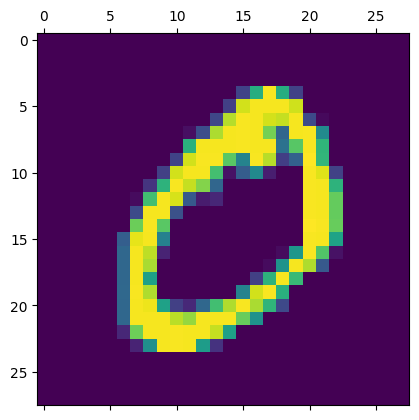

In [5]:
plt.matshow(x_train[1])

In [6]:
y_train[1]

0

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4710 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2828 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9262


In [11]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9269


[0.2649405002593994, 0.9269000291824341]

In [16]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.88408941e-02, 3.56887739e-07, 5.04610837e-02, 9.66455460e-01,
       2.72514974e-03, 1.09552182e-01, 1.41671433e-06, 9.99792457e-01,
       1.14285365e-01, 7.01353729e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[3])

0

In [21]:
y_test[3]

0

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    6,    2,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    8,  932,   14,   10,    5,   11,    9,   37,    3],
       [   2,    0,   19,  918,    0,   27,    2,   12,   23,    7],
       [   1,    1,    4,    1,  924,    0,   10,    4,    9,   28],
       [   7,    3,    4,   32,   11,  784,   10,    6,   29,    6],
       [   8,    3,    7,    1,    8,   22,  903,    2,    4,    0],
       [   1,    5,   24,    6,   10,    0,    0,  955,    2,   25],
       [   4,   11,    6,   20,   10,   26,    9,   11,  870,    7],
       [   8,    7,    2,   10,   34,    7,    0,   22,    7,  912]],
      dtype=int32)>

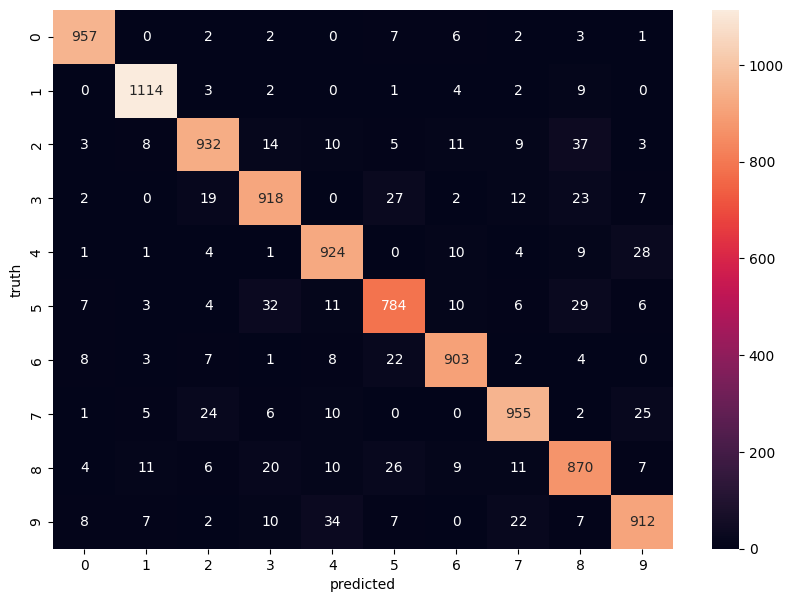

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

# Adding hidden layer

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2718 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1214 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0521 - accuracy: 0.9836


In [33]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9767


[0.07338473200798035, 0.9767000079154968]

In [34]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    3,    0,    2,    4,    0,    2,    2],
       [   0, 1121,    3,    3,    0,    1,    2,    1,    4,    0],
       [   3,    2, 1009,    2,    0,    0,    2,    2,   11,    1],
       [   0,    0,    1,  995,    0,    2,    0,    4,    2,    6],
       [   0,    0,    2,    1,  957,    0,    5,    2,    2,   13],
       [   3,    1,    0,   14,    1,  860,    3,    1,    5,    4],
       [   2,    2,    2,    1,    3,    6,  935,    0,    7,    0],
       [   1,    5,   11,    5,    2,    0,    0,  991,    0,   13],
       [   3,    0,    1,    6,    2,    2,    1,    2,  953,    4],
       [   2,    3,    0,    5,    6,    3,    0,    5,    4,  981]],
      dtype=int32)>

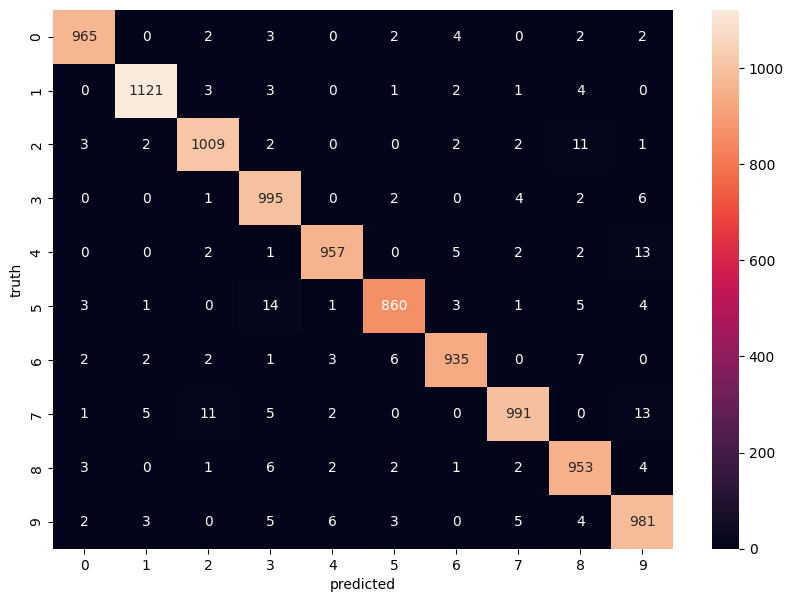

In [36]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

## without flatten array

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2721 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1245 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9840
